## Обучение моделей

В этом практическом задании две обязательные и одна дополнительная задача. 
<br>
*Обязательные задачи* нужно сделать для того, чтобы проверить, что вы действительно усвоили материал. Если у вас всё получилось, то можете переходить к следующей теме.
<br>
*Дополнительные задачи* для тех, кто хочет потренироваться с функцией feature_importances_ в деревьях. 
<br>
Удачи!

Цели практического задания: 

1.   Научиться обучать модель дерева решений с помощью sklearn.
2.   Научиться пользоваться параметром random_state в дереве решения 
3.   Научиться использовать знания о feature importances в дереве решения




## Обязательные задачи

### Описание датасета:
- `id`: идентификатор записи;
- `is_manufacturer_name`: признак производителя автомобиля;

- `region_*`: регион;
- `x0_*`: тип топлива;
- `manufacturer_*`: производитель;
- `short_model_*`: сокращённая модель автомобиля;
- `title_status_*`: статус;
- `transmission_*`: коробка передач;
- `state_*`: штат;
- `age_category_*`: возрастная категория автомобиля;

- `std_scaled_odometer`: количество пройденных миль (после стандартизации);
- `year_std`: год выпуска (после стандартизации);
- `lat_std`: широта (после стандартизации);
- `long_std`: долгота (после стандартизации);
- `odometer/price_std`: отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`: количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`: количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`: длина наименования автомобиля (после стандартизации);
- `model_word_count_std`: количество слов в наименовании автомобиля (после стандартизации);
- `month_std`: номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`: день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`: количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`: стоимость;
- `price_category`: категория цены.

1. *Обучение модели классификации*

Обучите модель классификации с помощью DecisionTreeClassifier как продемонстрировано в материалах. Для этого сделайте следующие шаги:

1. Загрузите файл с данными `vehicles_dataset_prepared.csv`
2. Положите копию датасета из п1 в `df_prepared`
3. Из `df_prepared` удалите колонки `price`, `odometer/price_std`
4. Поделите датасет на тренировочную и тестовую выборки
5. Обучите модель дерева решений на тренировочной выборке
6. Сделайте предикт на тестовой выборке
7. Замерьте точность на тестовой выборке и выведите матрицу ошибок 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 

In [49]:
df = pd.read_csv("vehicles_dataset_prepared.csv")
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,x0_diesel,x0_electric,x0_gas,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,1.0,0.0,0.0,...,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0.0,0.0,0.0,...,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0.0,0.0,1.0,...,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0.0,0.0,1.0,...,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0.0,0.0,0.0,...,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


In [50]:
df_prepared = df.copy()
df_prepared = df_prepared.drop(['price',"odometer/price_std"], axis=1)
x = df_prepared.drop(["price_category"], axis=1)
y = df_prepared.price_category

In [11]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
train_x.shape, test_x.shape

((6733, 1460), (2886, 1460))

In [16]:
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier()

In [17]:
predicted_train = clf.predict(train_x)
predicted_test = clf.predict(test_x)

In [18]:
predicted_train

array(['high', 'high', 'high', ..., 'medium', 'high', 'medium'],
      dtype=object)

In [19]:
predicted_test

array(['high', 'medium', 'low', ..., 'low', 'high', 'low'], dtype=object)

In [20]:
accuracy_score(train_y, predicted_train)

1.0

In [21]:
accuracy_score(test_y,predicted_test)

0.6677061677061678

2. *Random_state в дереве решений*

Попробуйте 10 раз обучить `clf = DecisionTreeClassifier()` на одних и тех же данных и замерьте значение точности. Покажите, что точность изменяется от прогона к прогону. 

Попробуйте сделать такой же эксперимент, но добавьте входной параметр random_state равным какому то числу, например `clf2 = DecisionTreeClassifier(random_state=42)`. Теперь повторите эксперимент. Меняется ли точность на тестовой выборке от прогона к прогону?

In [29]:
for i in range(10):
    clf.fit(train_x, train_y)
    predicted_train = clf.predict(train_x)
    predicted_test = clf.predict(test_x)
    print("acc_train", accuracy_score(train_y,predicted_train))
    print("acc_test",accuracy_score(test_y,predicted_test) )
    

acc_train 1.0
acc_test 0.6770616770616771
acc_train 1.0
acc_test 0.6708246708246708
acc_train 1.0
acc_test 0.6711711711711712
acc_train 1.0
acc_test 0.6708246708246708
acc_train 1.0
acc_test 0.6742896742896742
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6694386694386695
acc_train 1.0
acc_test 0.6742896742896742
acc_train 1.0
acc_test 0.6725571725571725
acc_train 1.0
acc_test 0.6635481635481636


In [30]:
clf2 = DecisionTreeClassifier(random_state = 42)
for i in range(10):
    clf2.fit(train_x, train_y)
    predicted_train = clf2.predict(train_x)
    predicted_test = clf2.predict(test_x)
    print("acc_train", accuracy_score(train_y,predicted_train))
    print("acc_test",accuracy_score(test_y,predicted_test) )

acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705
acc_train 1.0
acc_test 0.6704781704781705


Узнайте, за что отвечает параметр random_state.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Так же, как и при делении выборки на треин и тест, в объявлении дерева решении `random_state` позволяет вам обеспечить "воспроизводимость" результатов. `Random_state` - это семя генератора случайных чисел, которое используется для выбора фичей во время поиска фичи для наилучшего разделения в узле. 

Алгоритм работает таким образом, что выбирает n фичей случайным образом, из которых затем выбирает лучшую фичу для разделения. Чтобы зафиксировать множество фичей, которые выбираются случайным образом во время обучения, нужно установить параметр `random_state` равным какому-то числу. 

## Дополнительные задачи





Рассчитайте feature_importances для обученной модели. Удалите все фичи с нулевым весом из тренировочного и тестового датасетов, и заново обучите модель. Проверьте, что качество модели не ухудшилось. 

Затем заново рассчитайте feature_importances и визулизируйте важность первых 20 фичей с помощью горизонтального bar plot.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
clf.feature_importances_

array([0.02996287, 0.00038991, 0.0011846 , ..., 0.00145568, 0.01672251,
       0.01836154])

In [32]:
f_imp_list = list(zip(train_x.columns,clf.feature_importances_))


[('id', 0.029962869156546338),
 ('is_audi', 0.0003899142984405082),
 ('is_ford', 0.0011845967733573532),
 ('is_chevrolet', 0.00344230609818016),
 ('is_toyota', 0.0032268386726258176),
 ('x0_diesel', 0.033097961449185156),
 ('x0_electric', 0.0006947852275420483),
 ('x0_gas', 0.002215861211742078),
 ('x0_hybrid', 0.001682879799380995),
 ('x0_other', 0.0006895386846688418),
 ('std_scaled_odometer', 0.08121632372713626),
 ('short_model_-benz', 0.0),
 ('short_model_1', 0.0),
 ('short_model_124', 0.0),
 ('short_model_128i', 0.0),
 ('short_model_135i', 0.0),
 ('short_model_1500', 0.0007374811437909025),
 ('short_model_163869', 0.0),
 ('short_model_1928', 0.0),
 ('short_model_1951', 0.0),
 ('short_model_1954', 0.0),
 ('short_model_1960s', 0.0),
 ('short_model_1966', 0.00038346458824074065),
 ('short_model_1968', 0.0),
 ('short_model_1972', 0.0),
 ('short_model_1977', 0.0),
 ('short_model_1978', 0.0),
 ('short_model_198.5', 0.0),
 ('short_model_1988', 0.0),
 ('short_model_1994', 0.0),
 ('short_

In [42]:
f_imp_list.sort(key = lambda x: x[1], reverse = True)
f_imp_list

[('year_std', 0.22630773422646722),
 ('std_scaled_odometer', 0.08121632372713626),
 ('model_len_std', 0.0768780187094762),
 ('desc_len_std', 0.07057606177319575),
 ('long_std', 0.04321116847827273),
 ('lat_std', 0.04222002193482808),
 ('x0_diesel', 0.033097961449185156),
 ('id', 0.029962869156546338),
 ('diff_years_std', 0.01836153775173019),
 ('dayofweek_std', 0.01672251201103528),
 ('manufacturer_kia', 0.009918221903885149),
 ('manufacturer_ram', 0.00975744743027789),
 ('short_model_wrangler', 0.008822873591411986),
 ('short_model_f-150', 0.006586872824935992),
 ('manufacturer_hyundai', 0.006190048202947712),
 ('model_word_count_std', 0.006143467759665364),
 ('model_in_desc_std', 0.005785165480128165),
 ('short_model_silverado', 0.005593794108379947),
 ('manufacturer_ford', 0.004945225808404394),
 ('short_model_Scion', 0.004865746378858322),
 ('manufacturer_mercedes-benz', 0.004614266590743073),
 ('manufacturer_volkswagen', 0.004548592565377808),
 ('short_model_tacoma', 0.00453481086

In [44]:
f_imp_list.index(('short_model_-benz', 0.0))

359

In [46]:
f_imp_list = f_imp_list[:359]

In [ ]:
train_x.drop([])
test_x

In [59]:
filter_list_f_imp = []
for i in f_imp_list:
    filter_list_f_imp.append(i[0])
train_x = train_x.filter(filter_list_f_imp)
test_x = test_x.filter(filter_list_f_imp)
test_x

,year_std,std_scaled_odometer,model_len_std,desc_len_std,long_std,lat_std,x0_diesel,id,diff_years_std,dayofweek_std,...,short_model_highlander,short_model_leaf,region_pueblo,region_anchorage / mat-su,region_kalispell,region_salem,region_phoenix,region_sacramento,"region_st louis, MO",region_central NJ
6070,0.852578,-0.565773,-0.684528,1.463295,-1.412820,1.335273,0.0,7309259437,-0.852578,-1.374972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8916,-0.087054,-0.512667,0.008307,-0.864776,0.419703,-1.435997,0.0,7310890175,0.087054,0.122182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4634,-2.279527,1.629268,-0.684528,-0.104523,-0.161061,0.863949,0.0,7302842180,2.279527,-0.875921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9530,0.226157,0.539238,-0.453583,-0.456081,1.034381,0.353876,0.0,7314654110,-0.226157,0.621233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8284,1.009183,-1.198239,0.008307,-0.954668,0.639266,-1.981009,0.0,7308059702,-1.009183,1.120284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,0.695973,-1.134694,0.123780,0.474128,0.636011,-0.530022,0.0,7305769100,-0.695973,-1.374972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,-0.243659,0.609907,-0.453583,-0.049933,-1.489428,1.394622,0.0,7316671552,0.243659,-0.875921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9535,-2.279527,1.766462,-0.915473,-0.892071,-1.368394,1.303917,0.0,7311557358,2.279527,0.621233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5471,0.382762,-0.123574,-0.569055,1.914206,0.305234,0.906971,0.0,7310549492,-0.382762,-0.376870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
clf.fit(train_x, train_y)
predicted_train = clf.predict(train_x)
predicted_test = clf.predict(test_x)
print("acc_train", accuracy_score(train_y,predicted_train))
print("acc_test",accuracy_score(test_y,predicted_test) )

acc_train 1.0
acc_test 0.667013167013167


In [72]:
a = clf.feature_importances_
a = sorted(a, reverse=True)
a[:20]

[0.18633765984126183,
 0.0841893358033611,
 0.07877160494166675,
 0.06886498803979374,
 0.05681040998869452,
 0.042851714902116124,
 0.03811302478776015,
 0.03409645756070882,
 0.033097961449185156,
 0.01612840397943176,
 0.00998036746938541,
 0.009124062056039026,
 0.009035365311167023,
 0.006919062497585173,
 0.006313878562102587,
 0.006264317593126856,
 0.006208132623513221,
 0.005913387923928676,
 0.005343157392780783,
 0.004955102457403584]

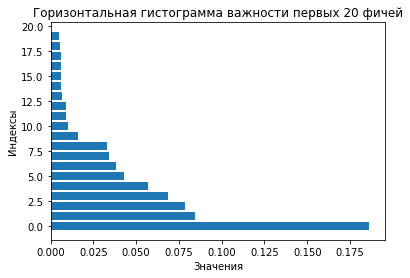

In [74]:
import matplotlib.pyplot as plt
top_20_numbers = a[:20]

# Создаем список индексов для оси y
y_indexes = range(len(top_20_numbers))

# Построение горизонтальной гистограммы
plt.barh(y_indexes, top_20_numbers)

# Настройка осей и заголовка
plt.xlabel('Значения')
plt.ylabel('Индексы')
plt.title('Горизонтальная гистограмма важности первых 20 фичей')

# Отображение графика
plt.show()

In [ ]:
# Решение 1
df = pd.read_csv('vehicles_dataset_prepared.csv')

df_prepared = df.copy()
df_prepared = df_prepared.drop(['price', 'odometer/price_std'], axis=1)

In [ ]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, predicted_test)

0.6704781704781705

In [ ]:
confusion_matrix(y_test, predicted_test)

array([[738,  54, 205],
       [ 46, 688, 219],
       [198, 229, 509]])

In [ ]:
# Решение 2
# 1 эксперимент

clf = DecisionTreeClassifier()

for i in range(10):
  clf.fit(x_train, y_train)

  predicted_train = clf.predict(x_train)
  predicted_test = clf.predict(x_test)

  print(accuracy_score(y_test, predicted_test), end ='--')

0.6642411642411642--0.6725571725571725--0.6729036729036729--0.667013167013167--0.6746361746361746--0.6687456687456688--0.6694386694386695--0.6673596673596673--0.6787941787941788--0.6711711711711712--

In [ ]:
# Решение 2
# 2 эксперимент

clf2 = DecisionTreeClassifier(random_state=42)

for i in range(10):
  clf2.fit(x_train, y_train)

  predicted_train = clf2.predict(x_train)
  predicted_test = clf2.predict(x_test)

  print(accuracy_score(y_test, predicted_test), end ='--')

0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--0.6704781704781705--